In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#laoad dataset and view first few lines

p1 = pd.read_csv('C:/online_retail_customer_churn.csv', encoding='ISO-8859-1')

p1.head()

,Customer_ID,Age,Gender,Annual_Income,Total_Spend,Years_as_Customer,Num_of_Purchases,Average_Transaction_Amount,Num_of_Returns,Num_of_Support_Contacts,Satisfaction_Score,Last_Purchase_Days_Ago,Email_Opt_In,Promotion_Response,Target_Churn
0,1,62,Other,45.15,5892.58,5,22,453.80,2,0,3,129,True,Responded,True
1,2,65,Male,79.51,9025.47,13,77,22.90,2,2,3,227,False,Responded,False
2,3,18,Male,29.19,618.83,13,71,50.53,5,2,2,283,False,Responded,True
3,4,21,Other,79.63,9110.30,3,33,411.83,5,3,5,226,True,Ignored,True
4,5,21,Other,77.66,5390.88,15,43,101.19,3,0,5,242,False,Unsubscribed,False


In [3]:
#get information about variables

pd.set_option('display.float_format', lambda x: '%.2f' % x)
p1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 15 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Customer_ID                 1000 non-null   int64  
 1   Age                         1000 non-null   int64  
 2   Gender                      1000 non-null   object 
 3   Annual_Income               1000 non-null   float64
 4   Total_Spend                 1000 non-null   float64
 5   Years_as_Customer           1000 non-null   int64  
 6   Num_of_Purchases            1000 non-null   int64  
 7   Average_Transaction_Amount  1000 non-null   float64
 8   Num_of_Returns              1000 non-null   int64  
 9   Num_of_Support_Contacts     1000 non-null   int64  
 10  Satisfaction_Score          1000 non-null   int64  
 11  Last_Purchase_Days_Ago      1000 non-null   int64  
 12  Email_Opt_In                1000 non-null   bool   
 13  Promotion_Response          1000 n

In [4]:
#drop first coulumn since it is not relevant to compuations of Summary of Statistics

p1 = p1.drop('Customer_ID', axis=1) 

#Summary of statistics

p1.describe()

,Age,Annual_Income,Total_Spend,Years_as_Customer,Num_of_Purchases,Average_Transaction_Amount,Num_of_Returns,Num_of_Support_Contacts,Satisfaction_Score,Last_Purchase_Days_Ago
count,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00
mean,43.27,111.96,5080.79,9.73,49.46,266.88,4.61,1.93,2.97,182.89
std,15.24,52.84,2862.12,5.54,28.54,145.87,2.90,1.40,1.39,104.39
min,18.00,20.01,108.94,1.00,1.00,10.46,0.00,0.00,1.00,1.00
25%,30.00,67.80,2678.68,5.00,25.00,139.68,2.00,1.00,2.00,93.00
50%,43.00,114.14,4986.19,9.00,49.00,270.10,5.00,2.00,3.00,180.50
75%,56.00,158.45,7606.47,14.00,74.00,401.60,7.00,3.00,4.00,274.00
max,69.00,199.73,9999.64,19.00,99.00,499.57,9.00,4.00,5.00,364.00


In [5]:
#check the missing values

p1.isnull().values.any()


False

Promotion_Response
Unsubscribed    361
Responded       338
Ignored         301
Name: count, dtype: int64


Text(0, 0.5, '')

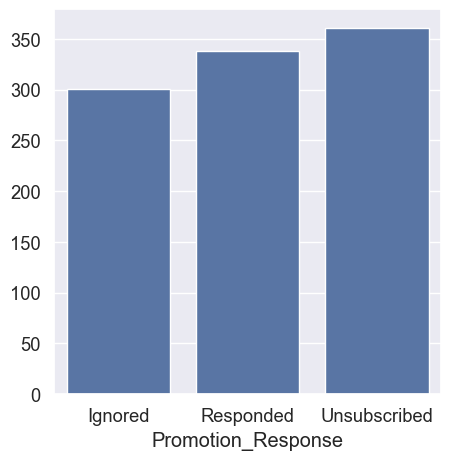

In [6]:
# Count distribution of Promotion_Response

promo = p1['Promotion_Response'].value_counts()
print(promo)

# Plot the graph
sns.set(font_scale = 1.2)
plt.figure(figsize=(5,5))

promo_plot = sns.countplot(data= p1, x = 'Promotion_Response', order = p1['Promotion_Response'].value_counts(ascending=True).index)
plt.ylabel('')

Email_Opt_In
True     529
False    471
Name: count, dtype: int64


Text(0, 0.5, '')

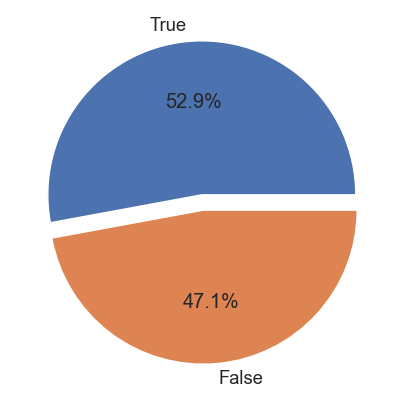

In [7]:
#Check distribution of Email_Opt_In

email = p1['Email_Opt_In'].value_counts()
print(email)

sns.set(font_scale = 1.2)
plt.figure(figsize=(5,5))

email = p1['Email_Opt_In'].value_counts()
email.plot(kind='pie', autopct='%0.1f%%', explode = [ 0.05, 0.05])
plt.ylabel('')



Gender
Female    342
Male      334
Other     324
Name: count, dtype: int64


Text(0, 0.5, '')

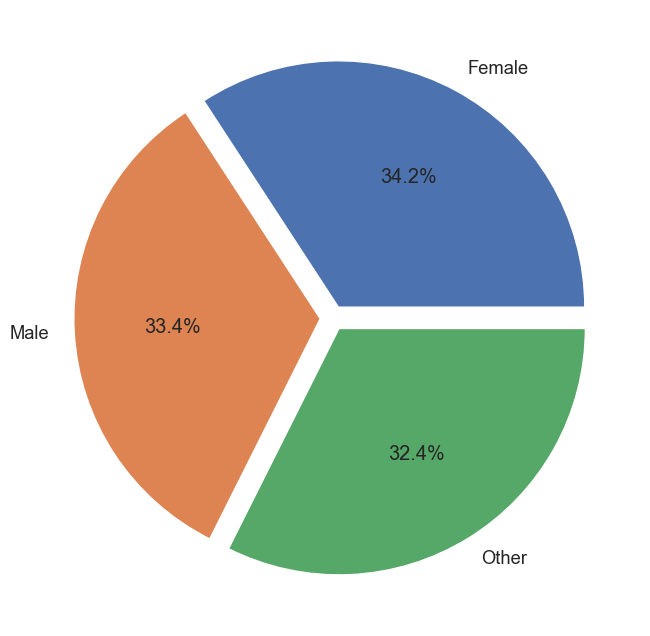

In [8]:
#Check distribution of Gender

gen = p1['Gender'].value_counts()
print(gen)

sns.set(font_scale = 1.2)
plt.figure(figsize=(8,8))

v1 = p1['Gender'].value_counts()
v1.plot(kind='pie', autopct='%0.1f%%', explode = [0.05, 0.05, 0.05])
plt.ylabel('')


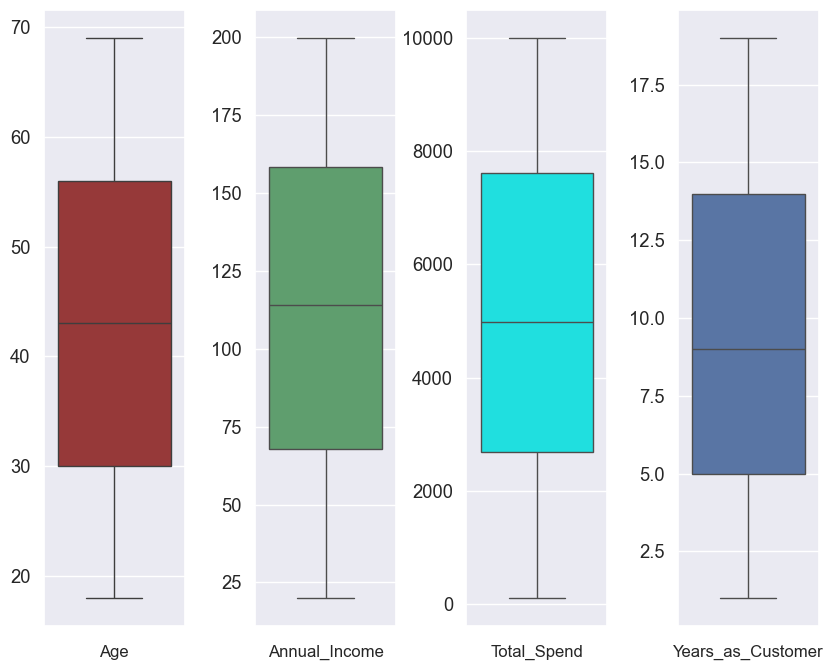

In [9]:
# Check for outliers for Age, Annual_Income, Total_Spend and Years_as_Customer

# Create 4 graphs
fig, ax = plt.subplots(1, 4, figsize=(10, 8))
 
# Create space between the plots
plt.subplots_adjust(wspace=0.5) 
 
# Plot boxplot for Age in the 1st subplot
sns.boxplot(data = p1['Age'], ax = ax[0], color ='brown')
ax[0].set_xlabel('Age', fontsize = 12)
ax[0].set_ylabel('')
 
# Plot boxplot for Annual_Income in the second subplot
sns.boxplot(data = p1['Annual_Income'], ax = ax[1], color = 'g')
ax[1].set_xlabel('Annual_Income', fontsize = 12)
ax[1].set_ylabel('')
 
# Plot boxplot for Total_Spend in the third subplot
sns.boxplot(data = p1['Total_Spend'], ax = ax[2], color = 'cyan')
ax[2].set_xlabel('Total_Spend', fontsize = 12)
ax[2].set_ylabel('')
 
# Plot boxplot for Years_as_Customer in the fourth subplot
sns.boxplot(data = p1['Years_as_Customer'], ax = ax[3])
ax[3].set_xlabel('Years_as_Customer', fontsize = 12)
ax[3].set_ylabel('')
 

for subplot in ax:
    subplot.set_xticklabels([])
    
plt.show()


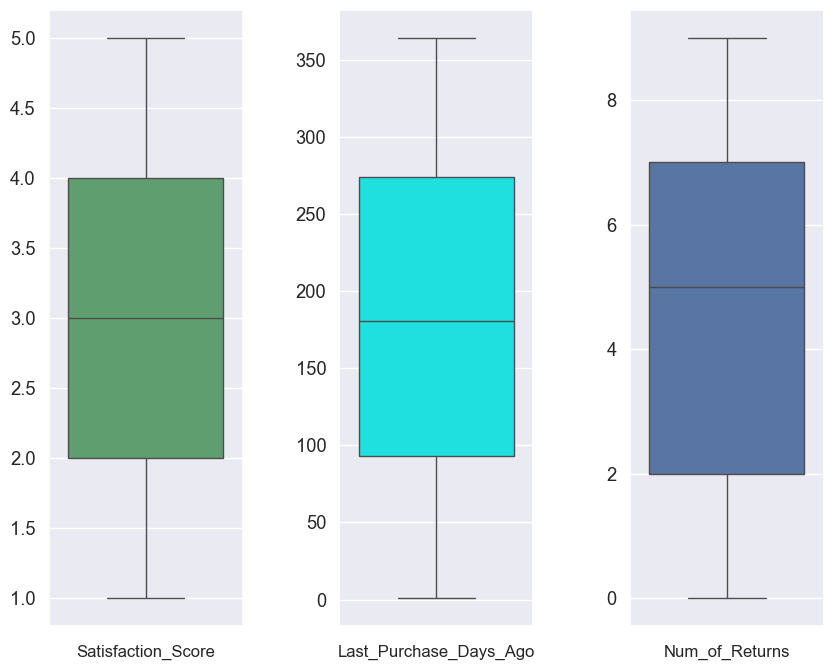

In [10]:
# Check for outliers for Satisfaction_Score, Last_Purchase_Days_Agoand Num_of_Returns


# Create 3 graphs
fig, ax = plt.subplots(1, 3, figsize=(10, 8))
 
# Create space between the plots
plt.subplots_adjust(wspace=0.5) 
 
 
# Plot boxplot for Satisfaction_Score in the second subplot
sns.boxplot(data = p1['Satisfaction_Score'], ax = ax[0], color = 'g')
ax[0].set_xlabel('Satisfaction_Score', fontsize = 12)
ax[0].set_ylabel('')
 
# Plot boxplot for Last_Purchase_Days_Ago in the third subplot
sns.boxplot(data = p1['Last_Purchase_Days_Ago'], ax = ax[1], color = 'cyan')
ax[1].set_xlabel('Last_Purchase_Days_Ago', fontsize = 12)
ax[1].set_ylabel('')
 
# Plot boxplot for Years_as_Customer in the fourth subplot
sns.boxplot(data = p1['Num_of_Returns'], ax = ax[2])
ax[2].set_xlabel('Num_of_Returns', fontsize = 12)
ax[2].set_ylabel('')
 

for subplot in ax:
    subplot.set_xticklabels([])
    
plt.show()


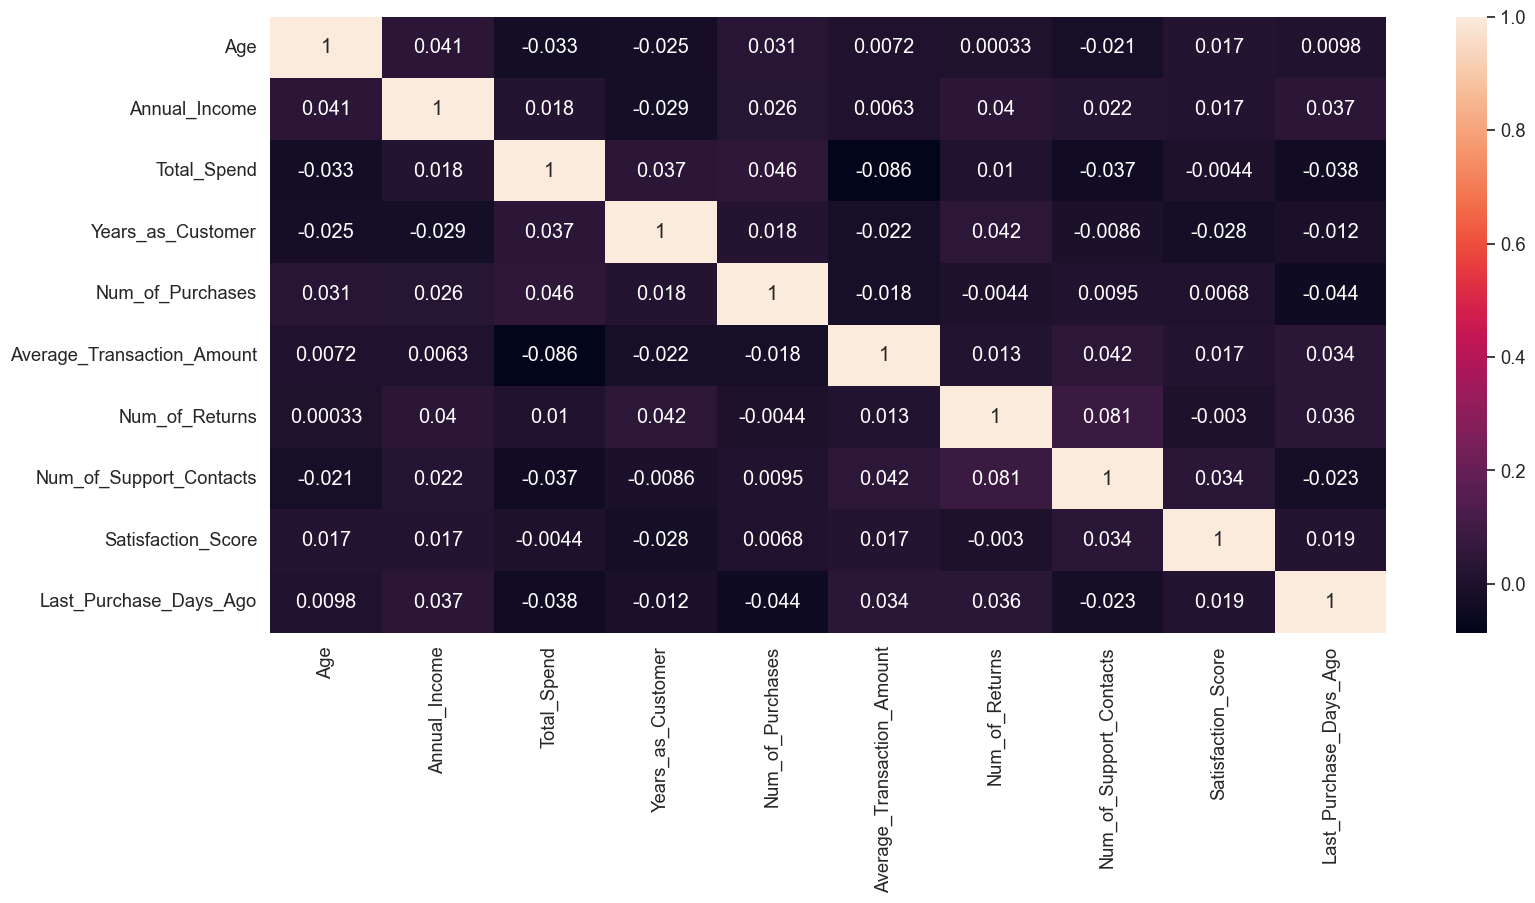

In [12]:
#Create a correllation heatmap

p2 = p1.drop(['Gender','Promotion_Response','Email_Opt_In','Target_Churn', ],axis=1) 

sns.heatmap(p2.corr(), annot = True)

plt.rcParams['figure.figsize'] = (18,8)

plt.show()

Text(0, 0.5, '')

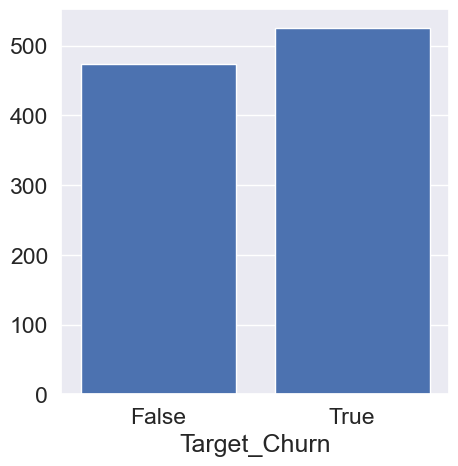

In [13]:
#look at distrubution in terms of Churn status, to ascertain if the class is balance or not.
p1['Target_Churn'].value_counts(dropna = False)

sns.set(font_scale = 1.5)
plt.figure(figsize=(5,5))

res = sns.countplot(data= p1, x = 'Target_Churn', saturation = 1)
plt.ylabel('')

In [14]:
#Convert response variable, 'Target_Churn' into binary:

p1['Target_Churn'] = p1['Target_Churn'].map({True: 1, False: 0})
p1.head()


,Age,Gender,Annual_Income,Total_Spend,Years_as_Customer,Num_of_Purchases,Average_Transaction_Amount,Num_of_Returns,Num_of_Support_Contacts,Satisfaction_Score,Last_Purchase_Days_Ago,Email_Opt_In,Promotion_Response,Target_Churn
0,62,Other,45.15,5892.58,5,22,453.80,2,0,3,129,True,Responded,1
1,65,Male,79.51,9025.47,13,77,22.90,2,2,3,227,False,Responded,0
2,18,Male,29.19,618.83,13,71,50.53,5,2,2,283,False,Responded,1
3,21,Other,79.63,9110.30,3,33,411.83,5,3,5,226,True,Ignored,1
4,21,Other,77.66,5390.88,15,43,101.19,3,0,5,242,False,Unsubscribed,0


In [15]:
# Encoding categorical variables

p2 = pd.get_dummies(p1, columns = ['Gender','Email_Opt_In', 'Promotion_Response'], dtype=int  )

p2.head()

,Age,Annual_Income,Total_Spend,Years_as_Customer,Num_of_Purchases,Average_Transaction_Amount,Num_of_Returns,Num_of_Support_Contacts,Satisfaction_Score,Last_Purchase_Days_Ago,Target_Churn,Gender_Female,Gender_Male,Gender_Other,Email_Opt_In_False,Email_Opt_In_True,Promotion_Response_Ignored,Promotion_Response_Responded,Promotion_Response_Unsubscribed
0,62,45.15,5892.58,5,22,453.80,2,0,3,129,1,0,0,1,0,1,0,1,0
1,65,79.51,9025.47,13,77,22.90,2,2,3,227,0,0,1,0,1,0,0,1,0
2,18,29.19,618.83,13,71,50.53,5,2,2,283,1,0,1,0,1,0,0,1,0
3,21,79.63,9110.30,3,33,411.83,5,3,5,226,1,0,0,1,0,1,1,0,0
4,21,77.66,5390.88,15,43,101.19,3,0,5,242,0,0,0,1,1,0,0,0,1


In [18]:
# Y-(Target_Churn) is an independent variable 

Y = p2['Target_Churn']

# X - is a dependent variable  

X = p2.drop('Target_Churn', axis = 1)

#Split data into training and testing with 80:20 ratio

from sklearn.model_selection import train_test_split

train_X, test_X, train_Y, test_Y = train_test_split(X,Y, test_size = 0.2, random_state= 42, shuffle=True)



In [21]:
# We implement first model, Logistic Regression:
#Scale features for model 
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
train_X = scaler.fit_transform(train_X)
test_X = scaler.transform(test_X)

from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(train_X,train_Y)



LogisticRegression()

In [26]:
# Prediction using the model

fcast_Y = lr.predict(test_X)
fcast_Y = pd.DataFrame(fcast_Y, columns= ['Predicted Values'])

# Accuracy, Confusion Matrix and Classification for Logistic Regression

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

cm = confusion_matrix(test_Y, fcast_Y)

accuracy = accuracy_score(test_Y, fcast_Y)

cr = classification_report(test_Y, fcast_Y)

print('Confusion Matrix :\n', cm)
print('Accuracy :', accuracy)
print('Classification Report :\n', cr)


Confusion Matrix :
 [[23 71]
 [36 70]]
Accuracy : 0.465
Classification Report :
               precision    recall  f1-score   support

           0       0.39      0.24      0.30        94
           1       0.50      0.66      0.57       106

    accuracy                           0.47       200
   macro avg       0.44      0.45      0.43       200
weighted avg       0.45      0.47      0.44       200



In [29]:
#We implement Logistic Regression with hyperparameter tuning

from sklearn.model_selection import GridSearchCV

param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
}
gs = GridSearchCV(LogisticRegression(), param_grid, cv=5)
gs.fit(train_X,train_Y)
best = gs.best_estimator_

# Prediction using the model

fcast_Y = best.predict(test_X)
fcast_Y = pd.DataFrame(fcast_Y, columns= ['Predicted Values'])

# Accuracy, Confusion Matrix and Classification for Logistic Regression

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

cm = confusion_matrix(test_Y, fcast_Y)

accuracy = accuracy_score(test_Y, fcast_Y)

cr = classification_report(test_Y, fcast_Y)

print('Confusion Matrix :\n', cm)
print('Accuracy :', accuracy)
print('Classification Report :\n', cr)



Confusion Matrix :
 [[17 77]
 [30 76]]
Accuracy : 0.465
Classification Report :
               precision    recall  f1-score   support

           0       0.36      0.18      0.24        94
           1       0.50      0.72      0.59       106

    accuracy                           0.47       200
   macro avg       0.43      0.45      0.41       200
weighted avg       0.43      0.47      0.42       200



In [30]:
#We implement Logistic Regression with bagging

from sklearn.ensemble import BaggingClassifier

bag = BaggingClassifier(base_estimator=LogisticRegression(), n_estimators=10, random_state=42)
bag.fit(train_X,train_Y)

# Prediction using the model

fcast_Y = bag.predict(test_X)
fcast_Y = pd.DataFrame(fcast_Y, columns= ['Predicted Values'])

# Accuracy, Confusion Matrix and Classification for Logistic Regression

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

cm = confusion_matrix(test_Y, fcast_Y)

accuracy = accuracy_score(test_Y, fcast_Y)

cr = classification_report(test_Y, fcast_Y)

print('Confusion Matrix :\n', cm)
print('Accuracy :', accuracy)
print('Classification Report :\n', cr)



Confusion Matrix :
 [[28 66]
 [38 68]]
Accuracy : 0.48
Classification Report :
               precision    recall  f1-score   support

           0       0.42      0.30      0.35        94
           1       0.51      0.64      0.57       106

    accuracy                           0.48       200
   macro avg       0.47      0.47      0.46       200
weighted avg       0.47      0.48      0.46       200



In [31]:
# We implement second model, Decision Trees:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

dt = DecisionTreeClassifier(random_state=42)
dt.fit(train_X,train_Y)


# Prediction using the model

fcast_Y = dt.predict(test_X)
fcast_Y = pd.DataFrame(fcast_Y, columns= ['Predicted Values'])

# Accuracy, Confusion Matrix and Classification for Logistic Regression

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

cm = confusion_matrix(test_Y, fcast_Y)

accuracy = accuracy_score(test_Y, fcast_Y)

cr = classification_report(test_Y, fcast_Y)

print('Confusion Matrix :\n', cm)
print('Accuracy :', accuracy)
print('Classification Report :\n', cr)


Confusion Matrix :
 [[52 42]
 [46 60]]
Accuracy : 0.56
Classification Report :
               precision    recall  f1-score   support

           0       0.53      0.55      0.54        94
           1       0.59      0.57      0.58       106

    accuracy                           0.56       200
   macro avg       0.56      0.56      0.56       200
weighted avg       0.56      0.56      0.56       200



In [33]:
# We implement the Random Forests  :

from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(train_X,train_Y)


# Prediction using the model

fcast_Y = rf.predict(test_X)
fcast_Y = pd.DataFrame(fcast_Y, columns= ['Predicted Values'])

# Accuracy, Confusion Matrix and Classification for Logistic Regression

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

cm = confusion_matrix(test_Y, fcast_Y)

accuracy = accuracy_score(test_Y, fcast_Y)

cr = classification_report(test_Y, fcast_Y)

print('Confusion Matrix :\n', cm)
print('Accuracy :', accuracy)
print('Classification Report :\n', cr)


Confusion Matrix :
 [[36 58]
 [33 73]]
Accuracy : 0.545
Classification Report :
               precision    recall  f1-score   support

           0       0.52      0.38      0.44        94
           1       0.56      0.69      0.62       106

    accuracy                           0.55       200
   macro avg       0.54      0.54      0.53       200
weighted avg       0.54      0.55      0.53       200

